In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Exercício 1

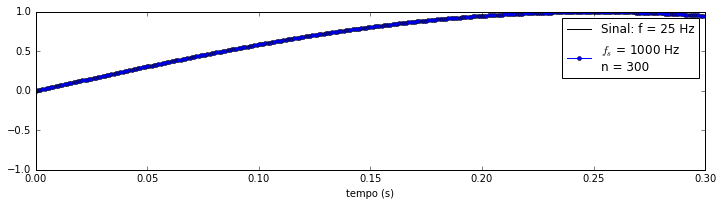

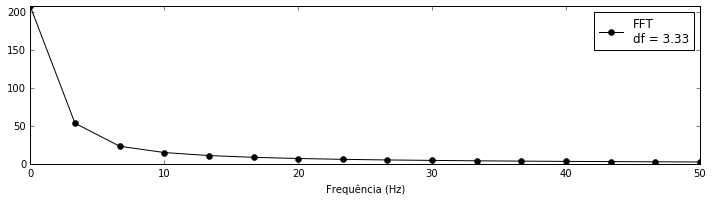

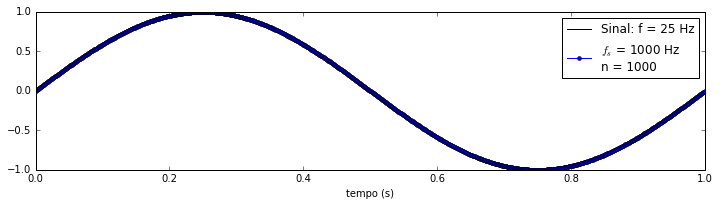

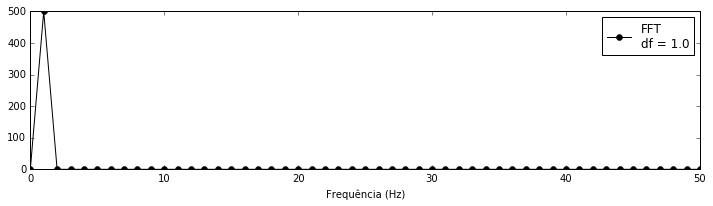

In [4]:
# Seno puro
fs = [(1000,300), (1000,1000)]#, (1000,2000), (2000,2000)]
      #(3,1000), (3,2000), (0.3,1000),(0.3,2000)]
for i,k in fs:
    ll = r'$f_s$ = ' + str(i) + ' Hz\nn = ' + str(k)
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*(tt+np.random.rand(1)/i))
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*t)
    Y = np.fft.fft(yy)
    freq = np.fft.fftfreq(len(Y),d=1/i)
    df = freq[1]-freq[0]
    ss = 'FFT\ndf = ' + str(round(df,2))
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(t,y,'k',label='Sinal: f = 25 Hz')
    plt.xlabel('tempo (s)')
    plt.plot(tt,yy,'bo-',label=ll,ms=4)
    plt.axis([0,k/i,-1,1])
    plt.legend(numpoints=1)
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(freq[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)]),'ko-',label=ss)
    plt.xlabel('Frequência (Hz)')
    plt.axis([0,50,0,max(abs(Y))])
    plt.legend(numpoints=1)

## Exercício 3

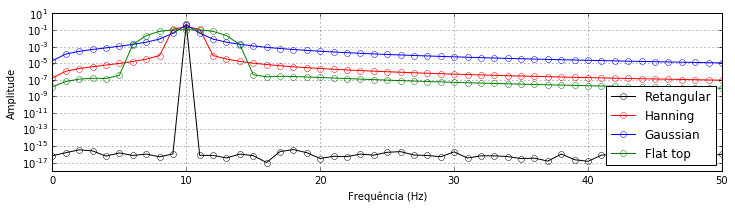

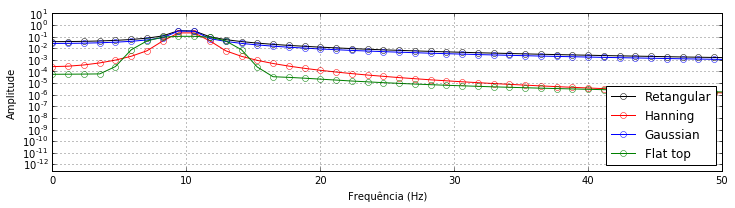

In [148]:
fs = [(1000,1000),(1000,850)]
for i,k in fs:
    ll = r'$f_s$ = ' + str(i) + ' Hz\nn = ' + str(k)
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*10*tt)
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*10*t)
    # retangular
    Y = np.fft.fft(yy)
    Y = Y / len(Y)
    # hanning
    h = signal.hanning(len(yy))
    Y_h = np.fft.fft(yy*h)/len(Y)
    # gaussiana
    g = signal.gaussian(len(yy),std=500)
    Y_g = np.fft.fft(yy*g)/len(Y)
    # flat top
    ft = signal.flattop(len(yy))
    Y_f = np.fft.fft(yy*ft)/len(Y)
    # frequências
    freq = np.fft.fftfreq(len(Y),d=1/i)
    
    df = freq[1]-freq[0]
    ss = 'FFT\ndf = ' + str(round(df,2))
    
    '''plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(t,y,'k',label='Sinal: f = 25 Hz')
    plt.xlabel('tempo (s)')
    plt.plot(tt,yy,'bo-',label=ll,ms=4)
    plt.axis([0,k/i,-1,1])
    plt.legend(numpoints=1)'''
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)]),
                 'ko-',mfc="None",mec='k',label='Retangular')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_h[0:int(len(Y)/2)]),
                     'ro-',mfc="None",mec='r',label='Hanning')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_g[0:int(len(Y)/2)]),
                 'bo-',mfc="None",mec='b',label='Gaussian')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_f[0:int(len(Y)/2)]),
                 'go-',mfc="None",mec='g',label='Flat top')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')
    plt.axis([0,50,min(min(abs(Y)),min(abs(Y_h))),1e1])
    plt.legend(numpoints=1,loc='lower right')
    plt.grid('on')

## Exercício 4

[0, 2, -5, 5]

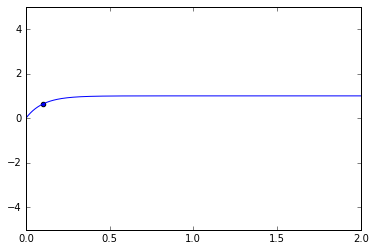

In [200]:
t = np.arange(0,100,0.001)
tau = 100e-3
E = (1 - np.exp(-t/tau))** signal.square(2*np.pi*10*t,duty=0.9)

plt.plot(t,E)
plt.scatter(0.1,0.63)
plt.axis([0,2,-5,5])